<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/Adhittiyaca-work/Adhittiyaca_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


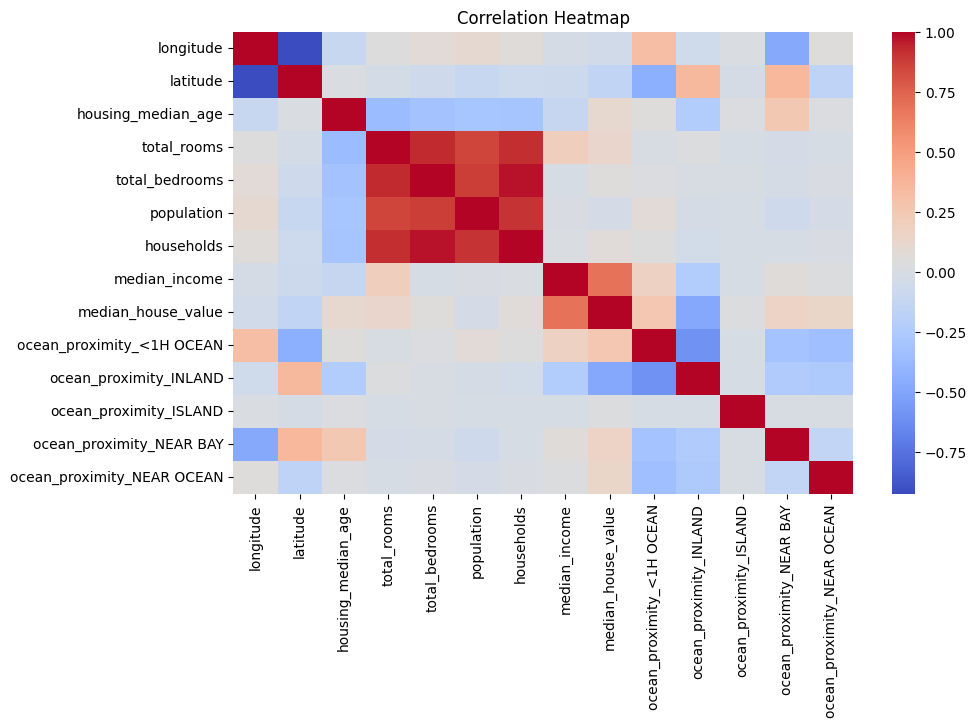

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Feature and target
x = df['total_rooms'].values
y = df['median_house_value'].values

# Mean
x_mean = np.mean(x)
y_mean = np.mean(y)

# Slope (m)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
m = numerator / denominator

# Intercept (c)
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 7.095972205890664
Intercept (c): 188152.5153420206


In [10]:
y_pred = m * x + c


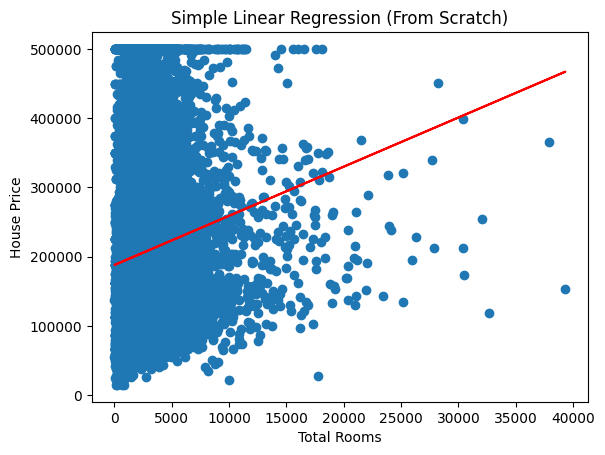

In [11]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel("Total Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression (From Scratch)")
plt.show()


In [12]:
# Features
X = df[['total_rooms', 'housing_median_age', 'population', 'households']].values
y = df['median_house_value'].values

# Add bias (1 column)
X = np.c_[np.ones(X.shape[0]), X]

# Beta calculation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Coefficients:", beta)


Coefficients: [ 1.43858961e+05  3.44947010e+01  1.69696891e+03 -5.52684479e+01
  4.52529758e+00]


In [13]:

 y_pred = X @ beta


In [14]:
# MSE
mse = np.mean((y - y_pred)**2)

# RMSE
rmse = np.sqrt(mse)

# R2
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 11699103511.763147
RMSE: 108162.39416619414
R2 Score: 0.12139229655504724
